In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [11]:
file_path = '../data/diabetes.csv'
df = pd.read_csv(file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Description
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Missing Values
df.isnull().sum()

#  No missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Class Distribution')

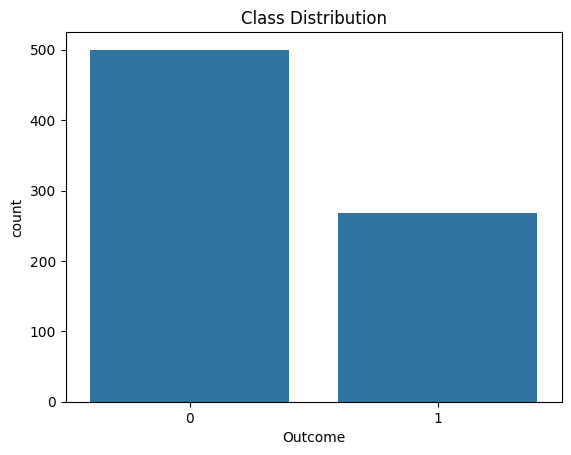

In [ ]:
# Class Balance
print(df['Outcome'].value_counts(normalize=True) * 100)
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution') 

# Imbalaced data
# 65% negative, 35% positive, need to apply stratified split and class weights

Text(0.5, 1.0, 'Correlation Matrix')

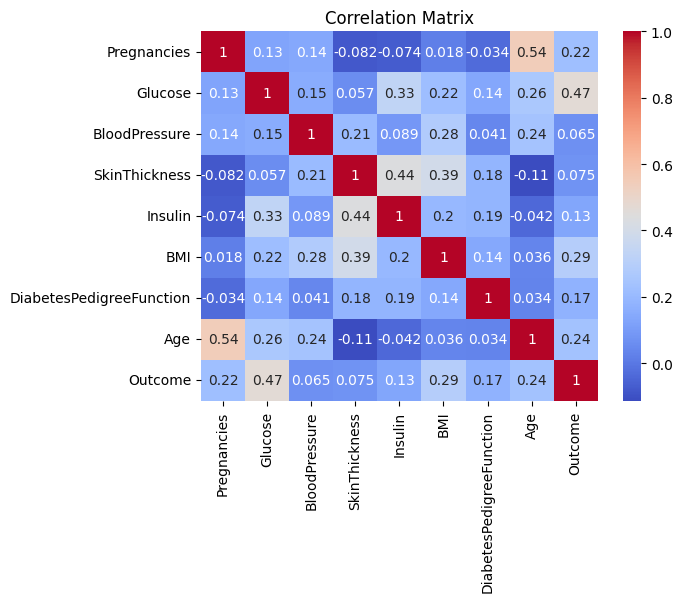

In [ ]:
# Correlations
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix') 

# High correlations: Glucose, BMI, Age, Pregnancies with Outcome
# BloodPressure, SkinThickness are less correlated with Outcome

Text(0.5, 0.98, 'Feature Distributions')

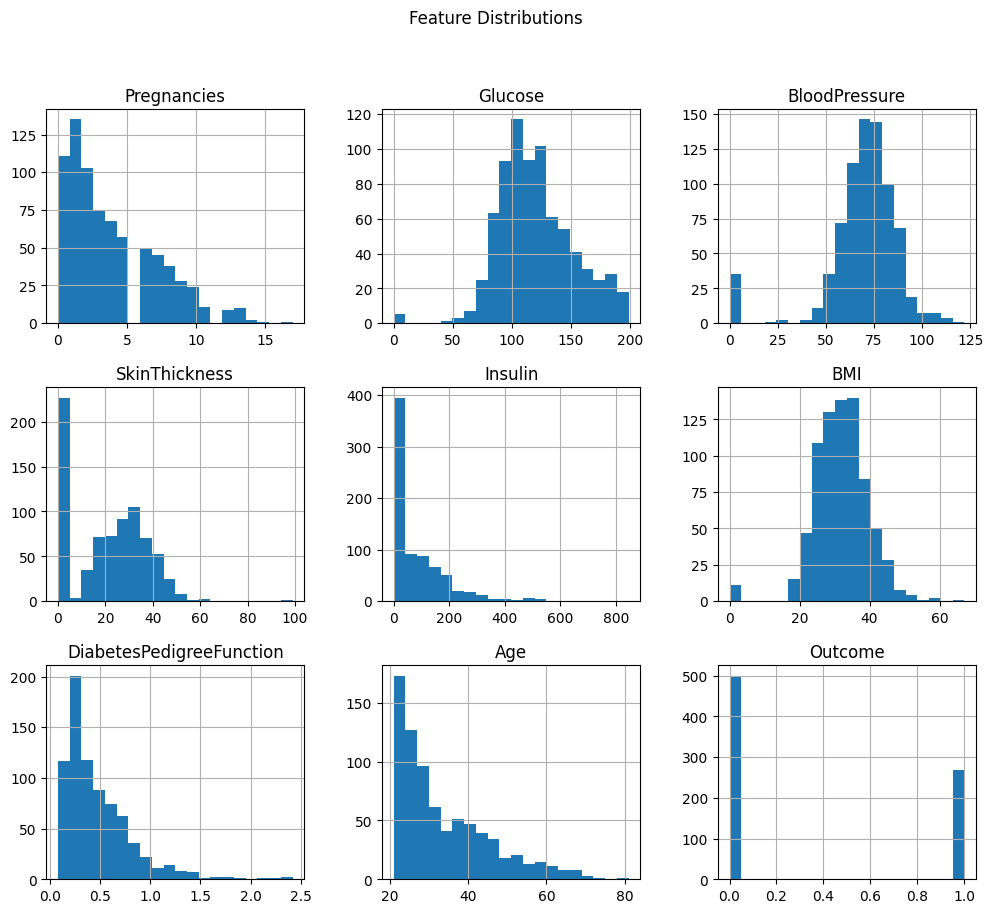

In [ ]:
# Distributions
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions')

# Distributions: Some skewed (e.g., Insulin) -> Scaling helps

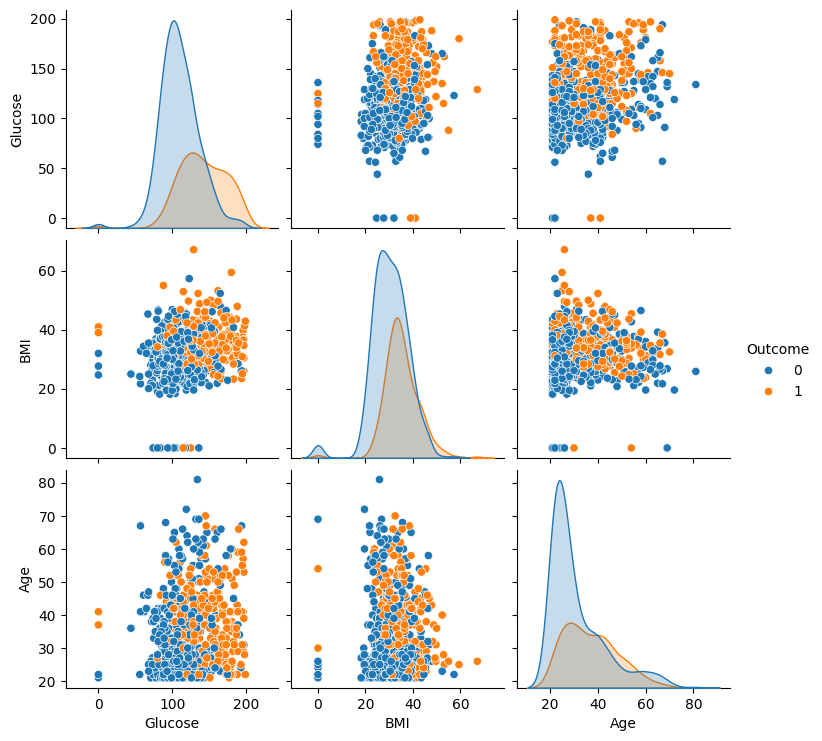

In [ ]:
# Pairplot (subset for speed)
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')

# Pairplot Insights: Non-linear separations -> Tree-based/ensemble models suitable; ANN for complex patterns

### EDA Conclusions for Model Selection:
- Binary classification, imbalanced -> Will use F1 as key metric, class weights.
- Numerical features, some correlations -> Baselines: LogisticReg (linear), DecisionTree (non-linear).
- Potential non-linearity -> Advanced: RF, XGBoost.
- Small dataset (768 samples) -> ANN feasible but prone to overfit; might need to use dropout/tuning.